In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../../paper/data/submissions.csv", parse_dates=["created_at", "deleted_at"])
df.head()

,id,created_at,deleted_at,owner_id,competition_id
0,competition-prediction-04G1SWLb4C7M6FG3z1SuH,2025-02-24 21:55:26.406286+00:00,2025-03-17 16:00:00+00:00,5pgfnqQCrj8vtlYsVaX2G,competition-KbeK95EUdNeKULp32z8ij
1,competition-prediction-0ElQX3r1bGaqhj6boYpoL,2025-02-25 00:09:44.978338+00:00,2025-03-17 16:00:00+00:00,1a8Wi0Bjc2kyyokxlgahB,competition-KbeK95EUdNeKULp32z8ij
2,competition-prediction-0K8VeWSTfhsXVLtAQpM4d,2025-02-18 09:12:42.082694+00:00,2025-03-17 16:00:00+00:00,o2wBu1glbjmu3mDgrrgj5,competition-KbeK95EUdNeKULp32z8ij
3,competition-prediction-0KvVpX0qMpwn2sKjTzX5D,2025-03-13 21:55:21.942967+00:00,NaT,sxhvvx7ZXJnRp2k26eW1q,competition-2np7VaBJ3aZlRSho6iJsp
4,competition-prediction-0NvSmNhHEVTr9dYwNTJB9,2025-02-26 11:58:32.997249+00:00,NaT,t5ykWV1EAGumpxrTiD4EZ,competition-2np7VaBJ3aZlRSho6iJsp


In [3]:
# Remove deleted predictions
df = df[pd.isnull(df["deleted_at"])]

# Get the date
df["created_at_date"] = df["created_at"].dt.date

# Drop columns
df = df.drop(columns=["created_at", "deleted_at"])

df.head()

,id,owner_id,competition_id,created_at_date
3,competition-prediction-0KvVpX0qMpwn2sKjTzX5D,sxhvvx7ZXJnRp2k26eW1q,competition-2np7VaBJ3aZlRSho6iJsp,2025-03-13
4,competition-prediction-0NvSmNhHEVTr9dYwNTJB9,t5ykWV1EAGumpxrTiD4EZ,competition-2np7VaBJ3aZlRSho6iJsp,2025-02-26
6,competition-prediction-17gXzNQxcTxxissTDCTcD,cJ51pv3572hzCfm1AGosY,competition-KbeK95EUdNeKULp32z8ij,2025-03-11
7,competition-prediction-1BjuyNLZi4L7mQJg6wApt,NgbkxDCwWNBJAwcRGKNhV,competition-UkJQVGKUA7TMNwRHVp7nb,2025-03-06
8,competition-prediction-1MhGQMitUFqR2FcUhRllg,oVlb2up8Z8yyfmpEVcglB,competition-2np7VaBJ3aZlRSho6iJsp,2025-03-14


In [4]:
count = df.groupby("created_at_date").count()["id"].reset_index().rename(columns={"id": "count"})
count.head()

,created_at_date,count
0,2025-01-18,3
1,2025-01-20,2
2,2025-01-22,2
3,2025-01-23,4
4,2025-01-25,3


In [5]:
from datetime import date, timedelta


def daterange(start_date: date, end_date: date):
    days = int((end_date - start_date).days)
    for n in range(days):
        yield start_date + timedelta(n)


start_date = date(2025, 1, 1)
end_date = date(2025, 3, 31)

unique_dates = df["created_at_date"].unique()
for single_date in daterange(start_date, end_date):
    if single_date not in unique_dates: 
        count.loc[len(count)] = [single_date, 0]

count = count.sort_values("created_at_date")
count.head()

,created_at_date,count
46,2025-01-01,0
47,2025-01-02,0
48,2025-01-03,0
49,2025-01-04,0
50,2025-01-05,0


In [6]:
count["total"] = count.sort_values("created_at_date")["count"].cumsum()

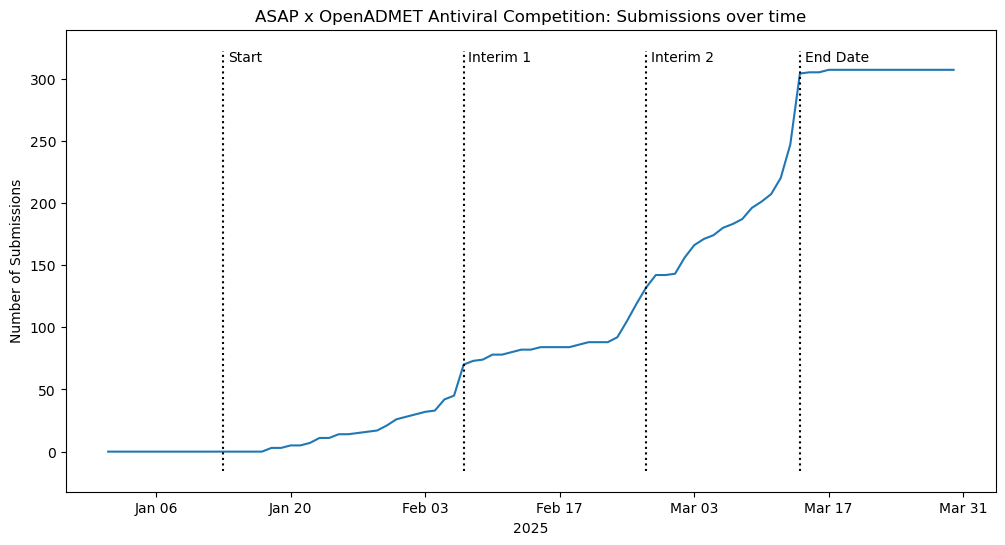

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns


fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=count, x="created_at_date", y="total", ax=ax)

ylim = ax.get_ylim()
xlim = ax.get_xlim()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO, interval=2))
ax.set_xlabel("2025")
ax.set_ylabel("Number of Submissions")
ax.set_title("ASAP x OpenADMET Antiviral Competition: Submissions over time")

t1 = mdates.date2num(np.datetime64('2025-01-13'))
t2 = mdates.date2num(np.datetime64('2025-02-07'))
t3 = mdates.date2num(np.datetime64('2025-02-26'))
t4 = mdates.date2num(np.datetime64('2025-03-14'))

for t, s in zip([t1, t2, t3, t4], ["Start", "Interim 1", "Interim 2", "End Date"]):
    ax.plot([t, t], ylim, "k:")
    ax.text(x=t + 0.5, y=ylim[1], s=s, ha="left", va="top")